In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,log_loss

In [4]:
df = sns.load_dataset('titanic')
df = df.dropna()

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [6]:
X = df.loc[:,(df.columns!='survived') & (df.columns!='alive')]
X = pd.get_dummies(X,drop_first=True)
y = df['survived']

In [7]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: survived, Length: 182, dtype: int64

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(len(X_train),len(X_test))

127 55


In [18]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
log_loss(y_test, y_pred_proba)

c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.41115883713642276

In [16]:
model.predict_proba(X_test)

array([[0.29390598, 0.70609402],
       [0.79738665, 0.20261335],
       [0.06989602, 0.93010398],
       [0.05927859, 0.94072141],
       [0.72740055, 0.27259945],
       [0.55988953, 0.44011047],
       [0.23461257, 0.76538743],
       [0.11841048, 0.88158952],
       [0.02387504, 0.97612496],
       [0.05005405, 0.94994595],
       [0.7237533 , 0.2762467 ],
       [0.0547373 , 0.9452627 ],
       [0.08547022, 0.91452978],
       [0.05005405, 0.94994595],
       [0.50643088, 0.49356912],
       [0.20945616, 0.79054384],
       [0.48461087, 0.51538913],
       [0.12854322, 0.87145678],
       [0.19895768, 0.80104232],
       [0.64540768, 0.35459232],
       [0.13486611, 0.86513389],
       [0.17324883, 0.82675117],
       [0.05864186, 0.94135814],
       [0.14777453, 0.85222547],
       [0.29496462, 0.70503538],
       [0.77584529, 0.22415471],
       [0.51415471, 0.48584529],
       [0.33575376, 0.66424624],
       [0.36620738, 0.63379262],
       [0.67717916, 0.32282084],
       [0.

In [19]:
model.coef_

array([[-0.29620888, -0.02131166,  0.62295099, -0.37396271,  0.00478605,
        -0.88716016,  0.17502285,  0.38868948, -0.40463987, -0.02315731,
        -0.45330139, -0.4048192 , -0.88716016,  1.21203507, -0.11131303,
        -1.20770765, -0.1417092 ,  0.6111133 , -0.13073358, -0.55173962,
        -0.40463987, -0.02315731]])

In [21]:
model.feature_names_in_

array(['pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone',
       'sex_male', 'embarked_Q', 'embarked_S', 'class_Second',
       'class_Third', 'who_man', 'who_woman', 'deck_B', 'deck_C',
       'deck_D', 'deck_E', 'deck_F', 'deck_G', 'embark_town_Queenstown',
       'embark_town_Southampton'], dtype=object)

## LogsticRegression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Duplicate key in file WindowsPath('c:/anaconda/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family:  IPAexGothic')


In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


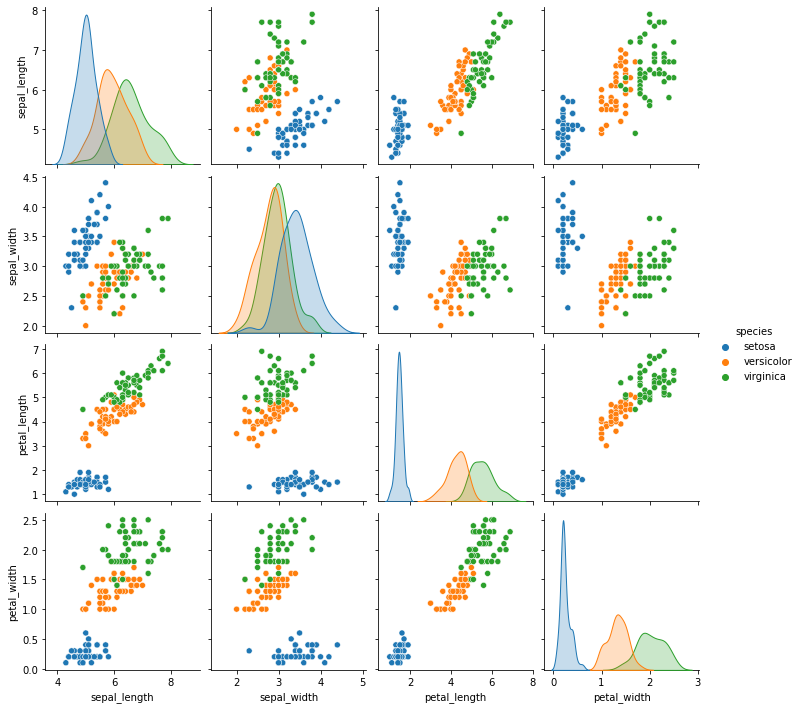

In [5]:
sns.pairplot(df,hue='species')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
y_col = 'species'
X = df.loc[:,df.columns!=y_col]
y = df[y_col]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
model = LogisticRegression(penalty='none',multi_class='ovr')
model.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', penalty='none')

In [8]:
y_pred_ovr = model.predict_proba(X_test)

In [9]:
print(model.classes_)
print(model.intercept_)
print(model.coef_)

['setosa' 'versicolor' 'virginica']
[   1.11952961    6.81324426 -255.99667969]
[[ 1.91635746e+00  6.80805390e+00 -1.08014054e+01 -5.01387880e+00]
 [-4.15059756e-01 -2.43651049e+00  1.48863127e+00 -3.08728666e+00]
 [-3.59713655e+02 -2.82241847e+02  5.44953421e+02  3.64284106e+02]]


In [10]:
y_pred_ovr = model.predict_proba(X_test)

## 分類器の精度指標

In [19]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso,LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [13]:
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]
#hold-out
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
# model 学習
model = LogisticRegression(penalty='none')
model.fit(X_train,y_train)
# model 予測
y_pred = model.predict(X_test)


In [14]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

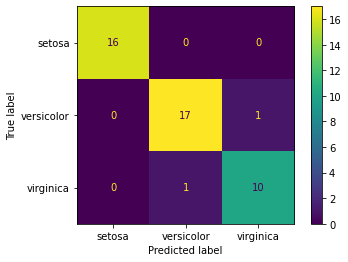

In [18]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

## Accuracy

In [21]:
y_true = [1,1,0,1,0,0,1,1]
y_pred = [1,1,1,0,0,1,0,1]

In [22]:
accuracy_score(y_true,y_pred)

0.5

## Precision：TP/(TP+FP)

In [31]:
from sklearn.metrics import precision_score

## Recall: TP/ (TP + FN)

In [24]:
from sklearn.metrics import recall_score

## Specificity: TN/(TN + FP)

In [25]:
np.array(y_true)!=1

array([False, False,  True, False,  True,  True, False, False])

In [26]:
y_true

[1, 1, 0, 1, 0, 0, 1, 1]

In [27]:
y_pred

[1, 1, 1, 0, 0, 1, 0, 1]

In [29]:
recall_score(np.array(y_true)!=1,np.array(y_pred)!=1)

0.3333333333333333

## 多クラス評価におけるPrecision

In [30]:
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]
#hold-out
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
# model 学習
model = LogisticRegression(penalty='none')
model.fit(X_train,y_train)
# model 予測
y_pred = model.predict(X_test)


In [32]:
#average=none
print(precision_score(y_test,y_pred,average=None))
#average=macro
print(precision_score(y_test,y_pred,average='macro'))
#average=micro
print(precision_score(y_test,y_pred,average='micro'))
print(accuracy_score(y_test,y_pred))

[1.         0.94444444 0.90909091]
0.9511784511784511
0.9555555555555556
0.9555555555555556


## Precision-Recall Curve

In [33]:
df = pd.read_csv('heart_preprocessed.csv')
df

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_electrocardiographic_left ventricular hypertrophy,rest_electrocardiographic_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,1.0,2,0,1,0,0,1,1,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,0,0,1,0,0,1,1,0,1,0,1
2,70,145,174,125,2.6,0,0,1,0,0,1,1,0,0,1,0,1,0,1
3,61,148,203,161,0.0,1,0,1,0,0,1,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,140,221,164,0.0,0,1,1,1,0,0,1,0,0,1,0,0,1,0
996,60,125,258,141,2.8,1,0,1,0,0,1,1,0,1,1,1,0,0,1
997,47,110,275,118,1.0,1,0,1,0,0,1,1,0,1,1,1,0,1,0
998,50,110,254,159,0.0,0,1,0,0,0,1,1,0,1,0,0,0,1,0


In [35]:
y_col = 'target'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [36]:
y_pred_proba[:10]

array([[0.49557168, 0.50442832],
       [0.28325139, 0.71674861],
       [0.99733357, 0.00266643],
       [0.0690726 , 0.9309274 ],
       [0.4793263 , 0.5206737 ],
       [0.99002567, 0.00997433],
       [0.66307296, 0.33692704],
       [0.7930834 , 0.2069166 ],
       [0.30219469, 0.69780531],
       [0.30219469, 0.69780531]])

In [37]:
from sklearn.metrics import precision_recall_curve

In [40]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba[:,1])

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


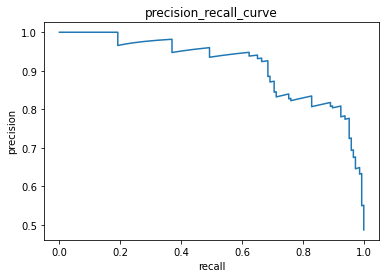

In [42]:
plt.plot(recall,precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision_recall_curve')
plt.show()

In [39]:
y_pred_proba[:,1]

array([5.04428319e-01, 7.16748609e-01, 2.66642704e-03, 9.30927402e-01,
       5.20673703e-01, 9.97432792e-03, 3.36927037e-01, 2.06916597e-01,
       6.97805306e-01, 6.97805306e-01, 2.62525153e-02, 1.38916491e-02,
       7.06278175e-02, 9.50286655e-01, 2.25953653e-02, 8.62105249e-01,
       4.32173686e-03, 9.97432792e-03, 9.87681444e-01, 7.66271764e-01,
       2.31022435e-02, 2.44326612e-01, 9.90941748e-01, 1.92013268e-01,
       8.66336108e-01, 9.74895040e-01, 5.41012044e-01, 2.33745901e-01,
       1.47895512e-02, 1.17989015e-01, 1.74002643e-02, 2.00704966e-03,
       9.26499259e-01, 6.19097022e-01, 6.04587055e-01, 3.15149304e-01,
       1.50570362e-01, 1.68710880e-01, 9.76430714e-01, 7.82941187e-02,
       4.42072296e-01, 1.38916491e-02, 8.75349193e-01, 5.18932679e-02,
       7.48825748e-01, 7.91682946e-01, 9.40571843e-01, 2.92165608e-02,
       8.62105249e-01, 9.77247439e-01, 9.74879155e-01, 9.59375626e-01,
       1.96703871e-01, 5.40394611e-01, 9.70561341e-02, 9.09344855e-01,
      

In [41]:
recall[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## F-score,F1-score

In [43]:
from sklearn.metrics import f1_score
y_true = [1,1,0,1,0,0,1,1]
y_pred = [1,1,1,0,0,1,0,1]
f1_score(y_true,y_pred)


0.6

In [51]:
#調和平均ver
from scipy.stats import hmean
hmean([recall_score(y_true,y_pred),precision_score(y_true,y_pred)])

0.6

In [48]:
precision

array([0.48666667, 0.48993289, 0.49324324, 0.49491525, 0.49829352,
       0.5       , 0.50171821, 0.50344828, 0.50519031, 0.5087108 ,
       0.51408451, 0.5177305 , 0.51957295, 0.52329749, 0.52517986,
       0.52707581, 0.53284672, 0.53479853, 0.53676471, 0.54074074,
       0.54477612, 0.54681648, 0.54887218, 0.5509434 , 0.54924242,
       0.55343511, 0.55555556, 0.55984556, 0.5620155 , 0.56640625,
       0.56862745, 0.57312253, 0.58      , 0.58232932, 0.58704453,
       0.58943089, 0.59183673, 0.59917355, 0.60165975, 0.60416667,
       0.6092437 , 0.61181435, 0.61702128, 0.61965812, 0.6223176 ,
       0.63043478, 0.63318777, 0.63157895, 0.63436123, 0.63716814,
       0.64      , 0.64285714, 0.64573991, 0.64864865, 0.64545455,
       0.65137615, 0.65437788, 0.66046512, 0.6635514 , 0.67298578,
       0.67619048, 0.67464115, 0.68115942, 0.68446602, 0.68780488,
       0.69458128, 0.69306931, 0.7       , 0.70707071, 0.7106599 ,
       0.71794872, 0.7253886 , 0.72395833, 0.72774869, 0.73157

## Thresholds vs Precision,Recall,Fscore

In [53]:
f1_scores = [hmean([p,r]) for p,r in zip(precision,recall)]

TypeError: 'numpy.float64' object is not iterable

In [54]:
plt.plot(thresholds,f1_scores[:-1],label='f1 score')
plt.plot(thresholds,precision[:-1],label='precision')
plt.plot(thresholds,recall[:-1],label='recall')
plt.xlabel('thresholds')
plt.legend()

NameError: name 'f1_scores' is not defined

TypeError: 'numpy.float64' object is not iterable

## ROC(Receiver Operating Charactarictic)

In [56]:
from sklearn.metrics import roc_curve

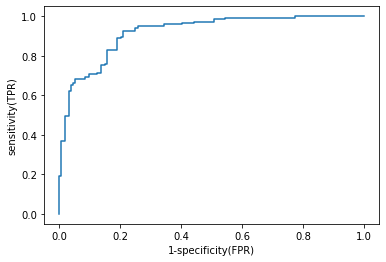

In [58]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlabel('1-specificity(FPR)')
plt.ylabel('sensitivity(TPR)')
plt.show()

In [59]:
y_pred_proba

array([[4.95571681e-01, 5.04428319e-01],
       [2.83251391e-01, 7.16748609e-01],
       [9.97333573e-01, 2.66642704e-03],
       [6.90725979e-02, 9.30927402e-01],
       [4.79326297e-01, 5.20673703e-01],
       [9.90025672e-01, 9.97432792e-03],
       [6.63072963e-01, 3.36927037e-01],
       [7.93083403e-01, 2.06916597e-01],
       [3.02194694e-01, 6.97805306e-01],
       [3.02194694e-01, 6.97805306e-01],
       [9.73747485e-01, 2.62525153e-02],
       [9.86108351e-01, 1.38916491e-02],
       [9.29372183e-01, 7.06278175e-02],
       [4.97133446e-02, 9.50286655e-01],
       [9.77404635e-01, 2.25953653e-02],
       [1.37894751e-01, 8.62105249e-01],
       [9.95678263e-01, 4.32173686e-03],
       [9.90025672e-01, 9.97432792e-03],
       [1.23185560e-02, 9.87681444e-01],
       [2.33728236e-01, 7.66271764e-01],
       [9.76897757e-01, 2.31022435e-02],
       [7.55673388e-01, 2.44326612e-01],
       [9.05825173e-03, 9.90941748e-01],
       [8.07986732e-01, 1.92013268e-01],
       [1.336638

## AUC

In [60]:
from sklearn.metrics import auc

In [61]:
auc(fpr,tpr)

0.9196762141967622

## 多クラス評価におけるPrecision

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plp
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize

In [63]:
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]
#holdout
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
#モデル学習
model = LogisticRegression(penalty='none')
model.fit(X_train,y_train)
#モデルの予測
y_pred_proba = model.predict_proba(X_test)


In [64]:
y_pred_proba

array([[0.00000000e+000, 3.17547083e-259, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 2.66318780e-242],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 8.28104278e-194, 1.00000000e+000],
       [1.00000000e+000, 1.68082488e-284, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 6.49390909e-212],
       [0.00000000e+000, 1.00000000e+000, 1.86857498e-178],
       [0.00000000e+000, 1.00000000e+000, 7.06791124e-289],
       [0.00000000e+000, 1.29693356e-181, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 7.76196518e-228],
       [0.00000000e+000, 1.00000000e+000, 5.02730070e-123],
       [0.00000000e+000, 1.00000000e+000, 2.03305497e-161],
       [0.00000000e+000, 1.00000000e+000, 6.45604522e-100],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000

## Macro平均

In [74]:
y_test_one_hot = label_binarize(y_test, classes=model.classes_)
n_classes = 3
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _= roc_curve(y_test_one_hot[:, i],y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i],tpr[i])


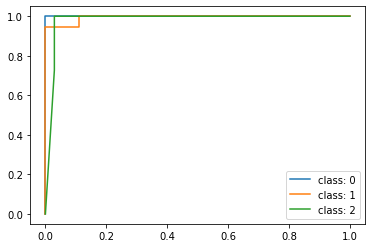

In [77]:
# それぞれのクラスのROC
for i in range(n_classes):
    plt.plot(fpr[i],tpr[i], label=f'class: {i}')
    plt.legend()

# np.interpの例

In [79]:
all_x = np.arange(7)
data_x = [0,2,5,6]
data_y = [0,2,4,6]
np.interp(all_x,data_x,data_y)

array([0.        , 1.        , 2.        , 2.66666667, 3.33333333,
       4.        , 6.        ])

In [81]:
np.unique(fpr)

array([{0: array([0., 0., 1.]), 1: array([0.        , 0.        , 0.11111111, 0.11111111, 0.74074074,
              1.        ]), 2: array([0.        , 0.02941176, 0.02941176, 0.52941176, 1.        ])}  ],
      dtype=object)

In [68]:
y_test_one_hot[:5]

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [69]:
y_test[:5]

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
Name: species, dtype: object

## K-means

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = sns.load_dataset('iris')

In [3]:
X = df.drop(columns=['species'])
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
# 標準化
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
#k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0)
labels = kmeans.fit_predict(X)

c:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
# labels = kmeans.predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [15]:
kmeans = KMeans(n_clusters=3,random_state=0)
labels = kmeans.fit_predict(X)
labels

c:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


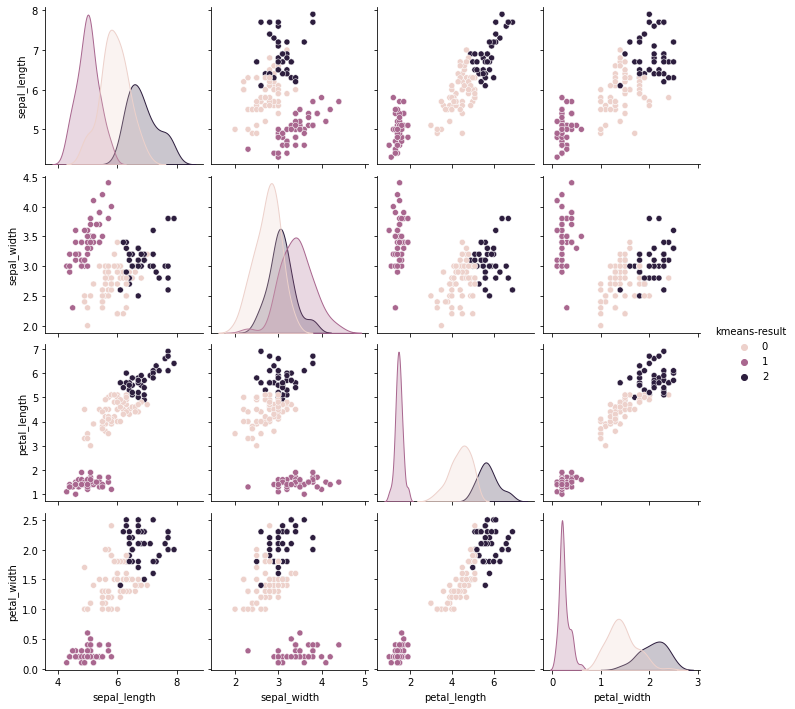

In [19]:
result_df = pd.concat([X,pd.DataFrame(labels,columns=['kmeans-result'])],axis=1)
sns.pairplot(result_df,hue='kmeans-result')

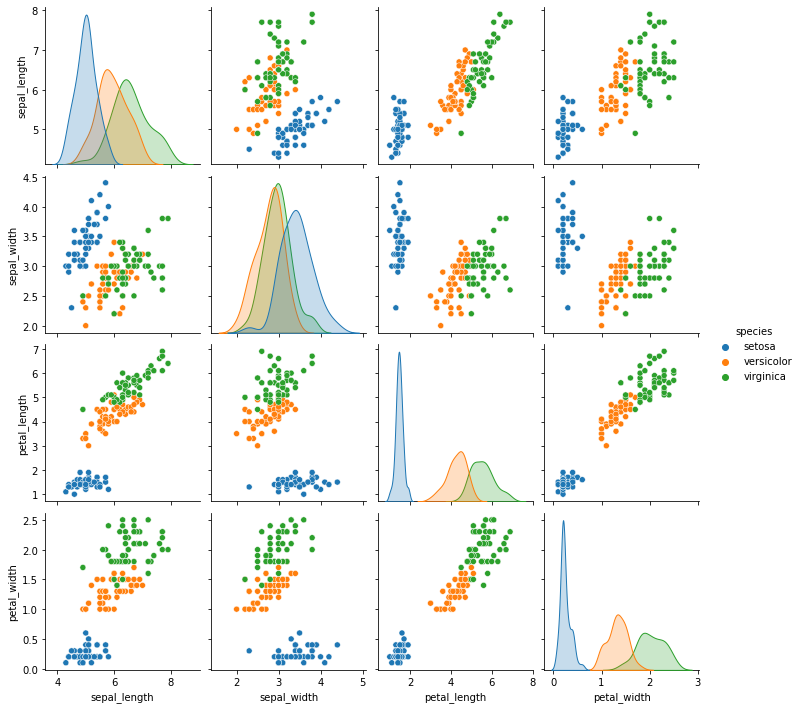

In [20]:
sns.pairplot(df,hue='species')

In [22]:
losses = []
for K in range(1,10):
    kmeans = KMeans(n_clusters=K,random_state=0).fit(X)
    losses.append(-kmeans.score(X))


c:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Text(0, 0.5, 'loss')

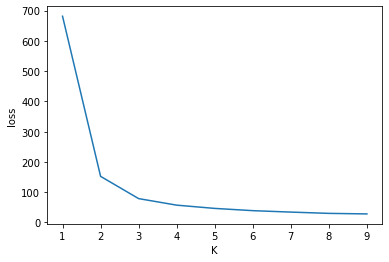

In [23]:
plt.plot(range(1,10),losses)
plt.xlabel('K')
plt.ylabel('loss')

## 階層クラスタリング

In [24]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [37]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

In [27]:
Z = linkage(X_scaled,method='ward')

In [29]:
Z[0]

array([101., 142.,   0.,   2.])

In [30]:
len(X_scaled)

150

In [32]:
Z[154-len(X_scaled)]

array([ 0.        , 17.        ,  0.13163218,  2.        ])

In [33]:
Z[13]

array([ 40.        , 154.        ,   0.17221655,   3.        ])

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0]],
 'dcoord': [[0.0, 1.7530028141991123, 1.7530028141991123, 0.0],
  [0.0, 4.061340113390718, 4.061340113390718, 0.0],
  [1.7530028141991123,
   6.607812239953405,
   6.607812239953405,
   4.061340113390718],
  [0.0, 4.243484952636869, 4.243484952636869, 0.0],
  [0.0, 8.00474726258123, 8.00474726258123, 0.0],
  [4.243484952636869,
   12.636843515277603,
   12.636843515277603,
   8.00474726258123],
  [6.607812239953405,
   27.249911456942908,
   27.249911456942908,
   12.636843515277603]],
 'ivl': ['(10)', '(10)', '(7)', '(22)', '(5)', '(25)', '(45)', '(26)'],
 'leaves': [267, 273, 277, 282, 283, 289, 290, 293],
 'color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2']}

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


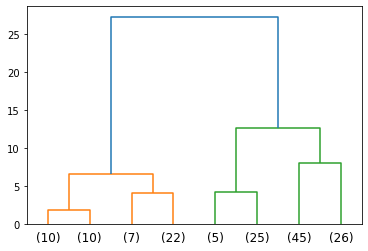

In [36]:
dendrogram(Z,truncate_mode='level',p=2)

## クラスタの分布表示

In [39]:
clusters = fcluster(Z,criterion='maxclust',t=3)

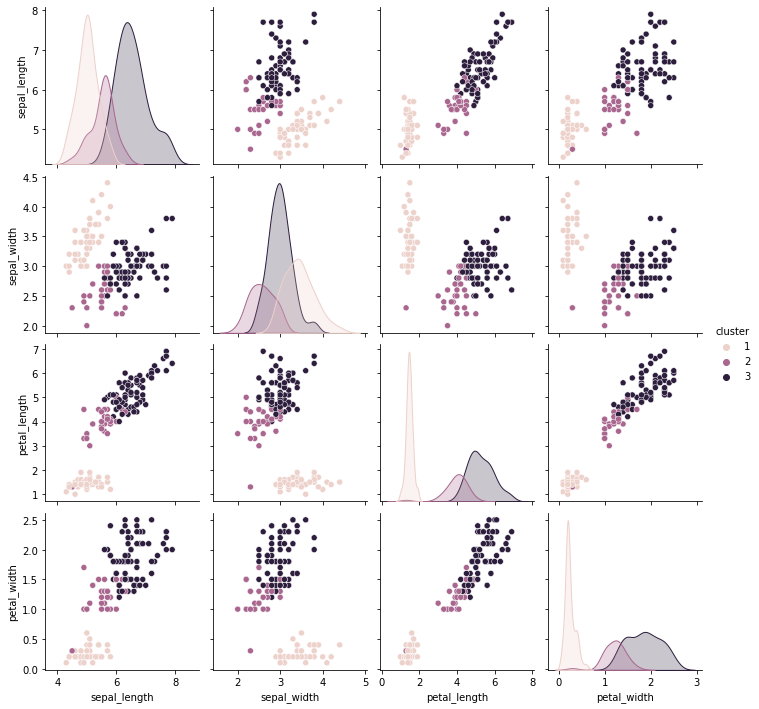

In [42]:
hc_result_df = pd.concat([X, pd.DataFrame({'cluster': clusters})],axis=1)
sns.pairplot(hc_result_df,hue='cluster')

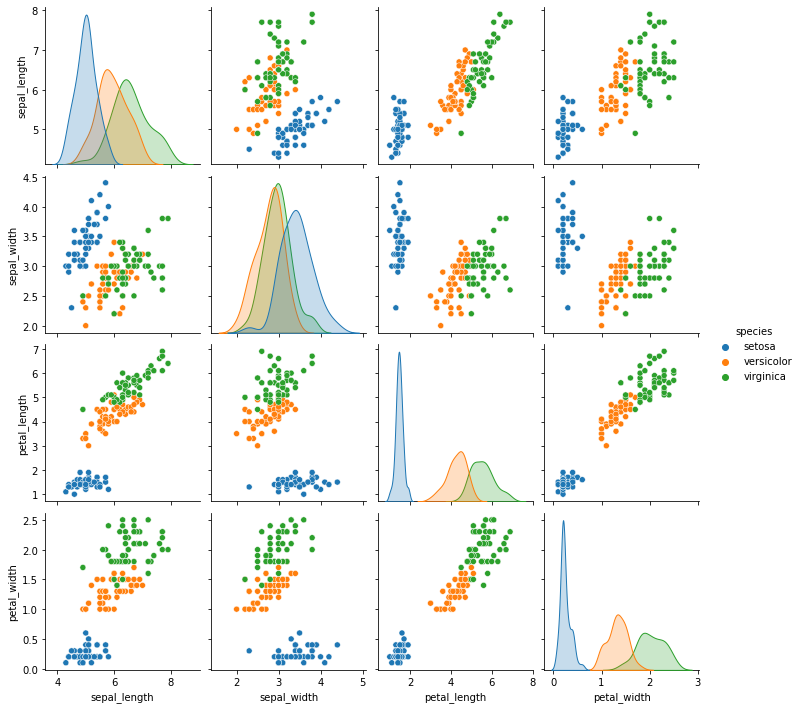

In [43]:
sns.pairplot(df,hue='species')
